In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

sns.set()

Ссылка на форму с ответами - https://forms.gle/wwNeBmZbkUxfiPvT7

## Датасет для первого задания

В этом блоке вам предстоит исследовать PCA с практической стороны, датасет - MNIST (handwritten digits, ужатые до размера 8x8)

In [103]:
from sklearn.datasets import load_digits

dataset = load_digits()
X = dataset.data
y = dataset.target

X3 = X
y3 = y

Отрисуем несколько примеров для наглядности

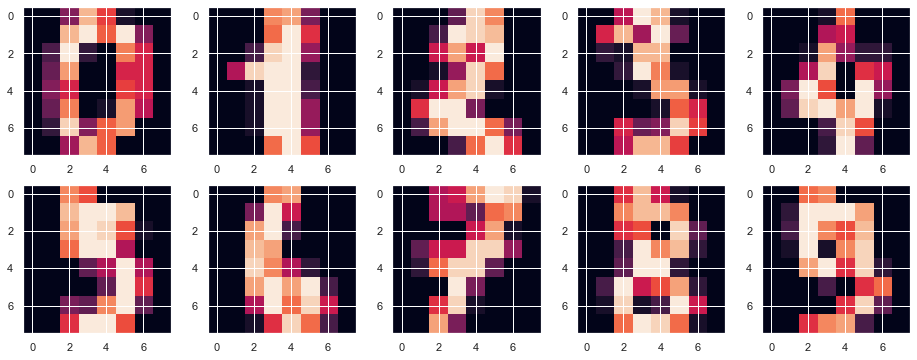

In [3]:
plt.figure(figsize=(16,6))

for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X[i,:].reshape([8,8]))

## Задание 1

Обучить PCA и изучить зависимость кол-ва главных компонент от дисперсии, которую они сохраняют при проекции.

In [4]:
pca = PCA()

pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

**Вопрос 1:** Какое минимальное количество главных компонент необходимо для сохранения суммарной explained_variance_ratio на уровне >= 0.95

In [5]:
for i in range(100):
    pca = PCA(n_components=i)
    pca.fit(X)
    if pca.explained_variance_ratio_.sum() >= 0.95:
        break

print('Минимальное количество главных компонент необходимо для сохранения суммарной explained_variance_ratio на уровне >= 0.95')
i

Минимальное количество главных компонент необходимо для сохранения суммарной explained_variance_ratio на уровне >= 0.95


29

Получив необходимое значение главных компонент, сделайте следующее:

1. Обучите PCA с кол-вом компонент, полученным в вопросе 1
2. Трансформируйте исходный датасет
3. Возьмите все объекты, на которых нарисован 0

**Вопрос 2:** чему равно среднее значение признаков из п.3 (усреднение делать по всему, округлить до 4 знака после запятой)?

При инициализации PCA используйте random_state=42 для воспроизводимости результатов

In [6]:
pca = PCA(n_components=29, random_state=42)
pca.fit(X)
X = pca.transform(X)  # X = pca.fit_transform(X)

indexes = []  # индексы нулей

for i in range(y.shape[0]):
    if y[i] == 0:
        indexes.append(i)
        
X = X[indexes]
round(X.mean(), 4)

0.5707

## Задание 2

На том же датасете, что и выше, применить K-means (random_state=42) и ответить на ряд вопросов

In [79]:
from sklearn.cluster import KMeans

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

Кластеризуйте нормализованный датасет (X_std) при помощи K-means

In [80]:
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(X_std)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

**Вопрос 3**: какой преобладающий номер кластера (начало с 0) у рукописных единиц?

In [86]:
import collections

one_indexes = []  # индексы единиц

for i in range(y.shape[0]):
    if y[i] == 1:
        one_indexes.append(i)
        
f = kmeans.labels_[one_indexes]
collections.Counter(f)

Counter({3: 96, 9: 58, 6: 27, 4: 1})

Также, как и на занятии, спроецируйте полученный результат на плоскость при помощи TSNE (random_state=42)

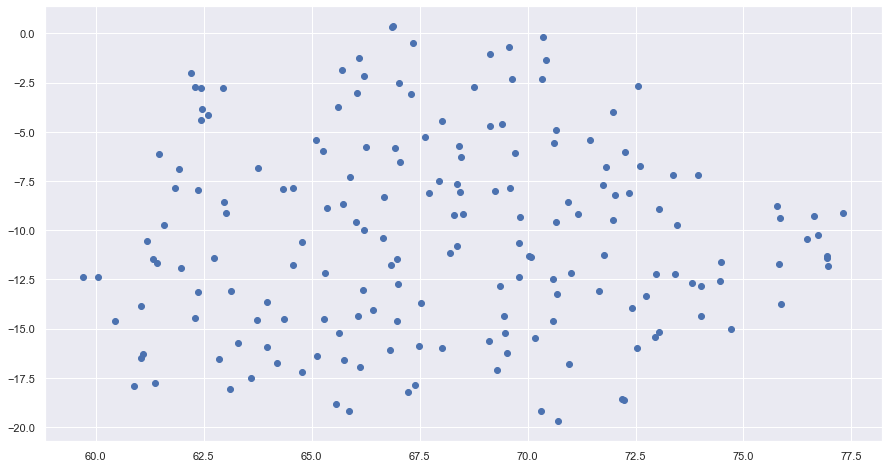

In [107]:
tsne = TSNE(random_state=42)

X_std_emb = tsne.fit_transform(X_std,y=y)

zero_indexes = []  # индексы нулей
for i in range(y.shape[0]):
    if y[i] == 0:
        zero_indexes.append(i)

X4 = X_std_emb[zero_indexes].reshape((178,2))[:, 0]
y4 = X_std_emb[zero_indexes].reshape((178,2))[:, 1]

plt.figure(figsize=(15, 8))
plt.scatter(x=X4, y=y4)

**Вопрос 4**: в каком диапазоне по оси X лежат объекты, соответствующие написанным от руки нулям (ответы округлить до 2 знака после запятой?

In [109]:
np.min(X4), np.max(X4)

(59.69702, 77.31494)